# Breast cancer diagnostic - Benign or Malignant

In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('data.csv')

# Exploratory data analysis

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
data = data.drop(['id','Unnamed: 32'],axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<AxesSubplot:>

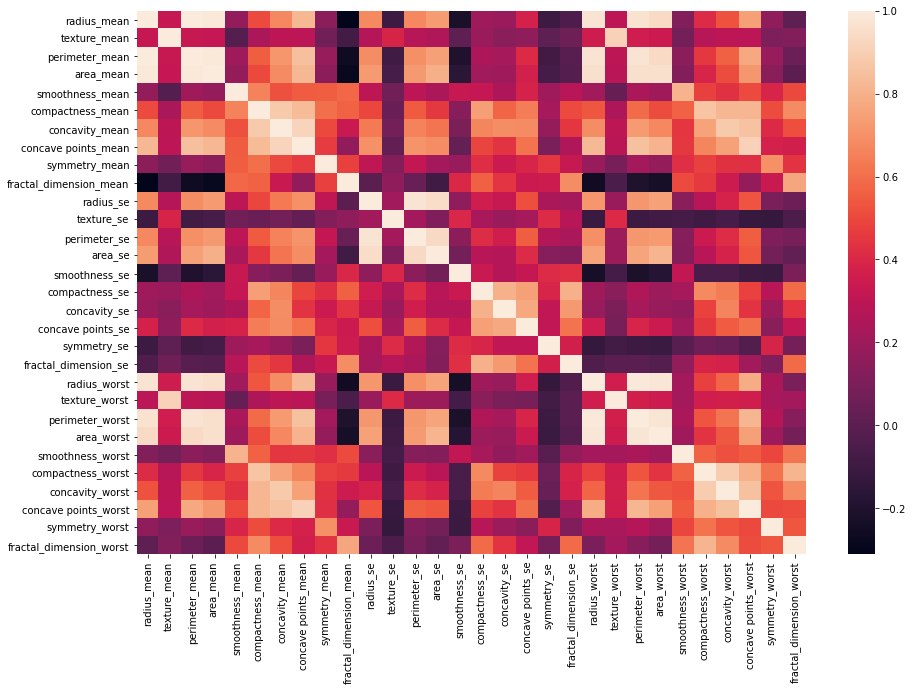

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr())

In [7]:
features = [feature for feature in data.columns if feature != 'diagnosis']
discrete_columns = [feature for feature in features if len(data[feature].unique()) < 20] 
continuous_columns = [feature for feature in features if feature not in discrete_columns]
len(features),len(discrete_columns),len(continuous_columns)

(30, 0, 30)

It shows that there aren't any discrete numerical feature in the dataset, also there aren't any categorical features in the data ... Now lets learn more out about our continuous numerical features

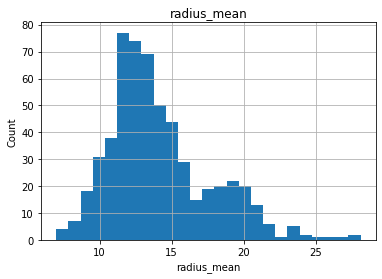

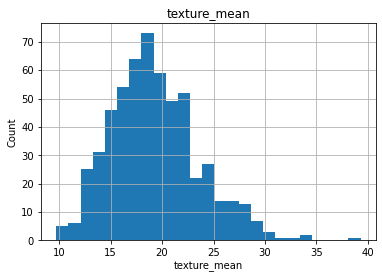

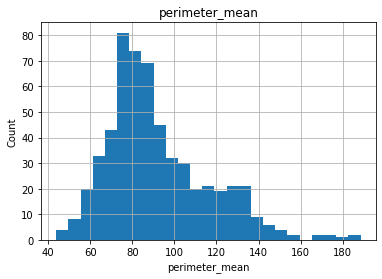

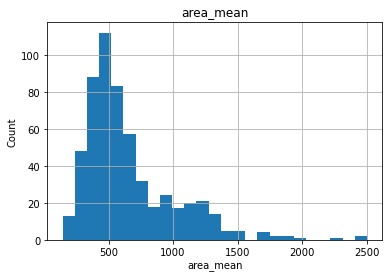

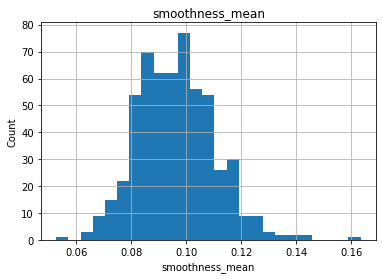

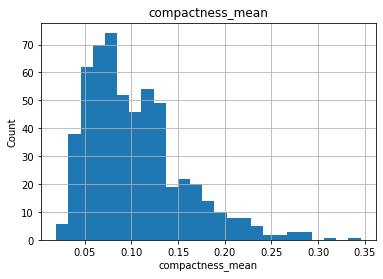

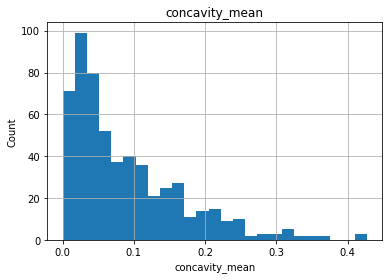

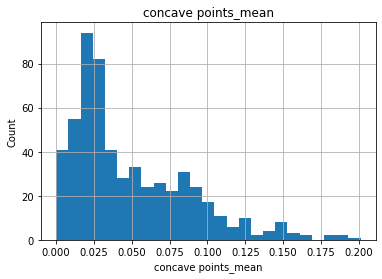

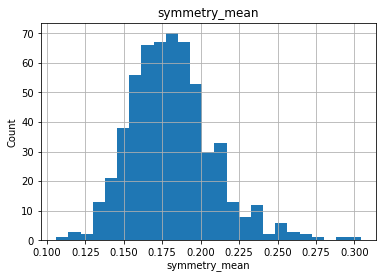

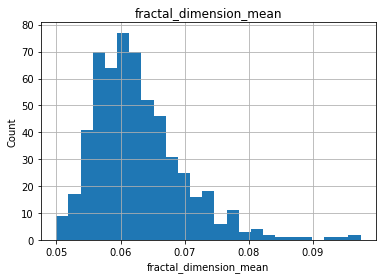

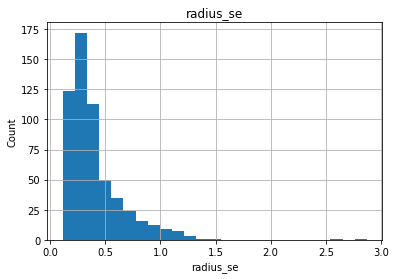

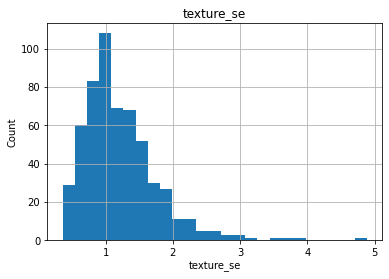

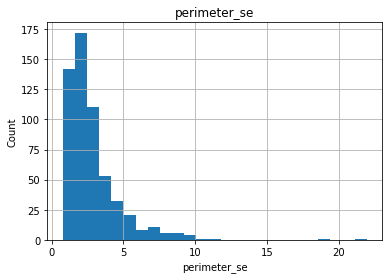

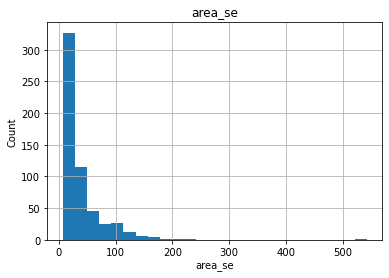

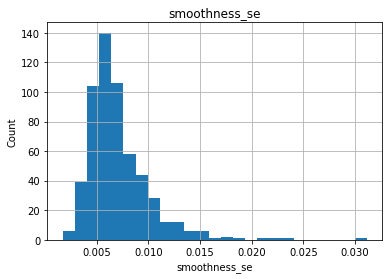

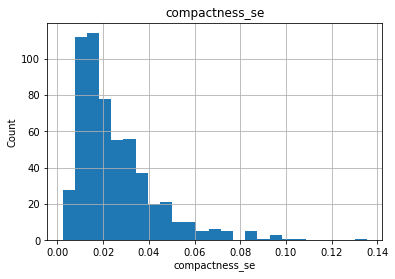

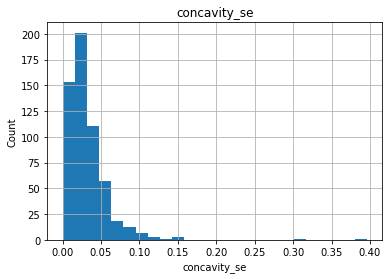

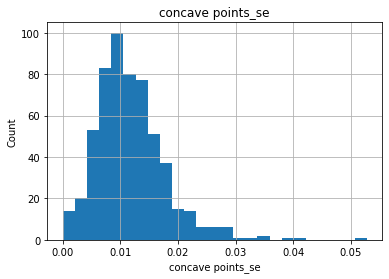

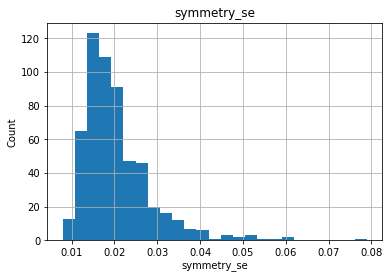

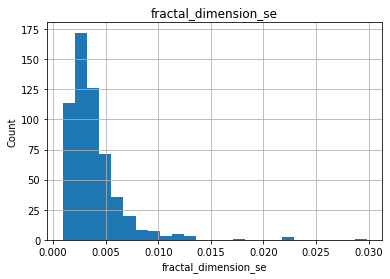

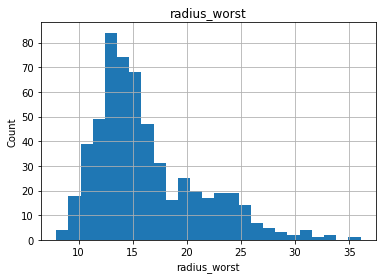

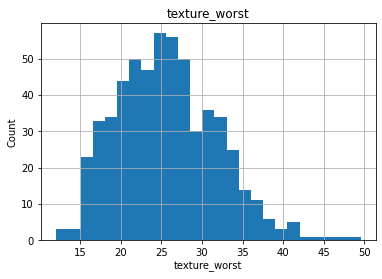

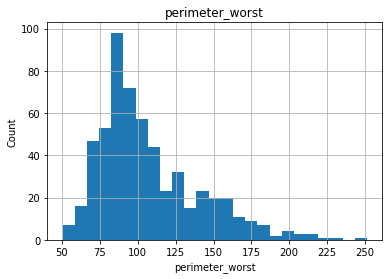

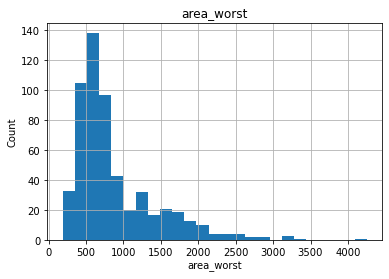

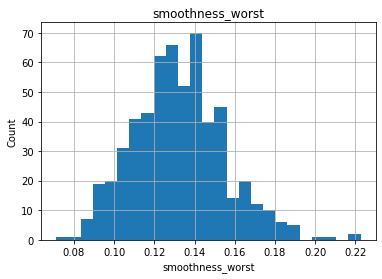

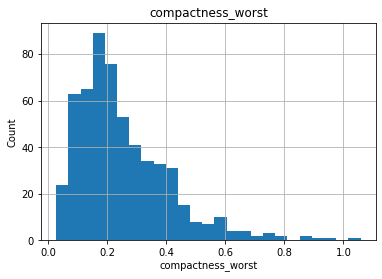

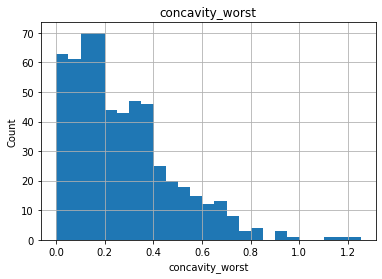

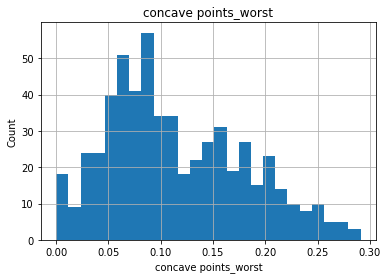

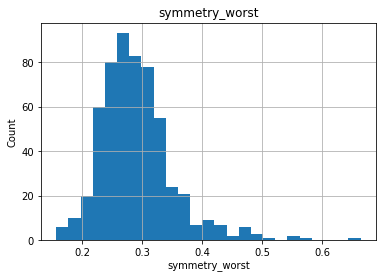

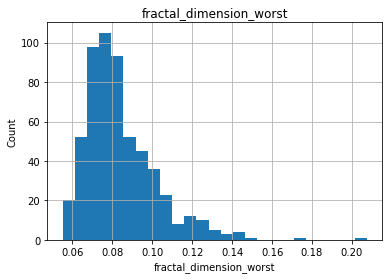

In [51]:
for feature in continuous_columns:
    data_plot=data.copy()
    data_plot[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Feature Engineering

From the above visualizations it is evident that features are skewed. Since in our ML algorithms,the data distribution being normally distributed improves the performance and helps gradient descent converge faster, lets make the possible features 'log normally' distributed  

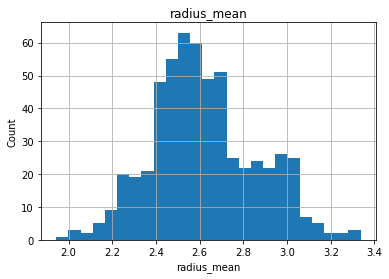

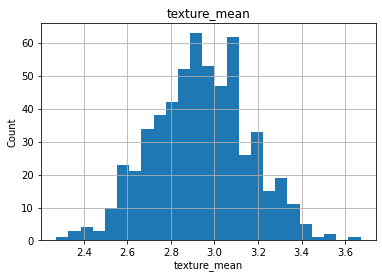

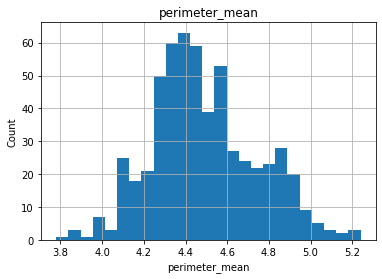

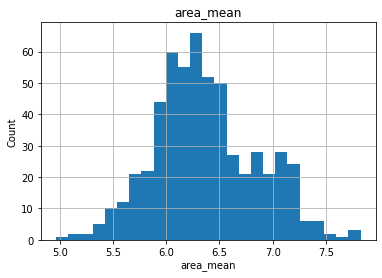

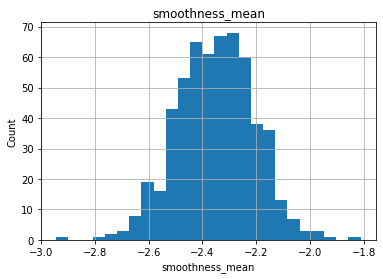

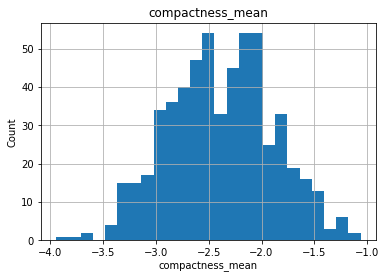

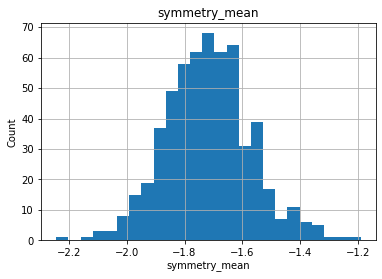

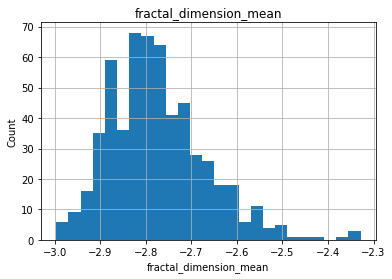

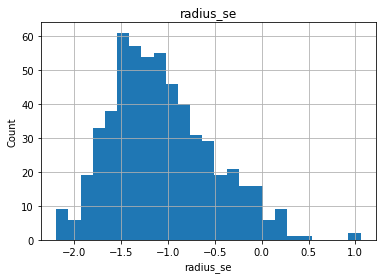

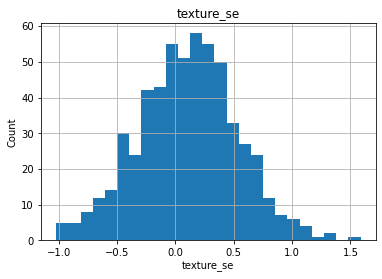

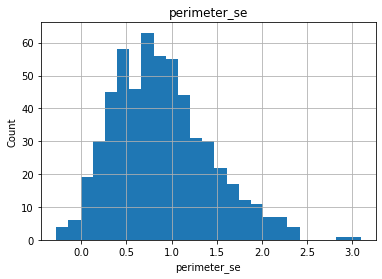

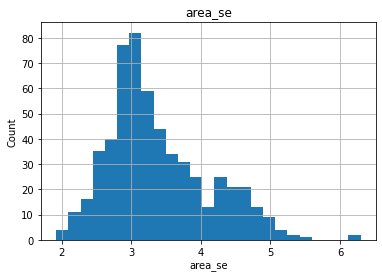

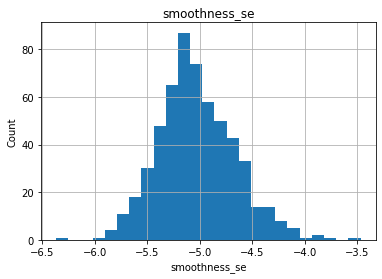

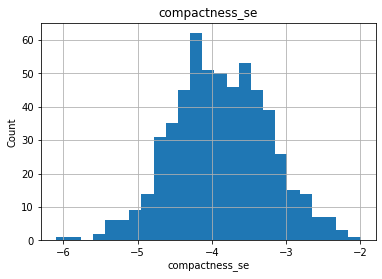

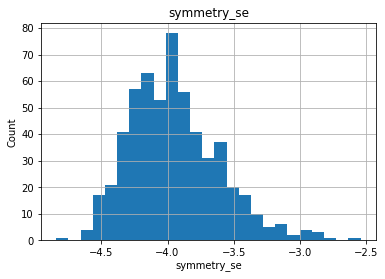

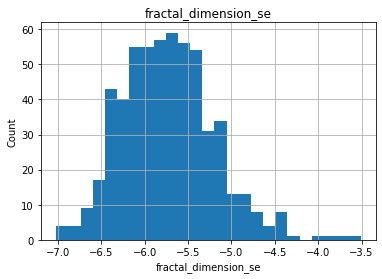

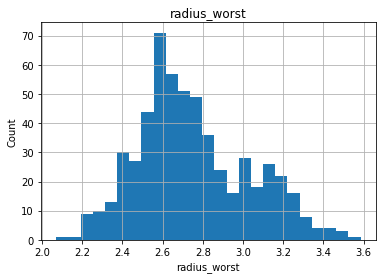

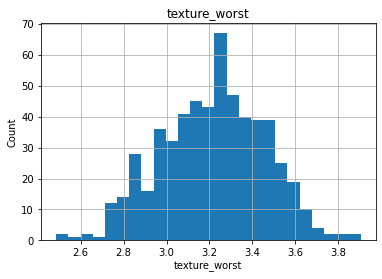

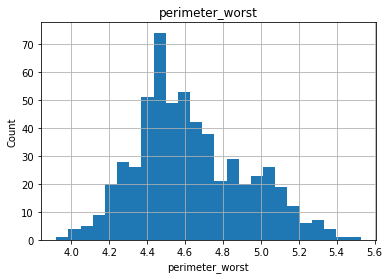

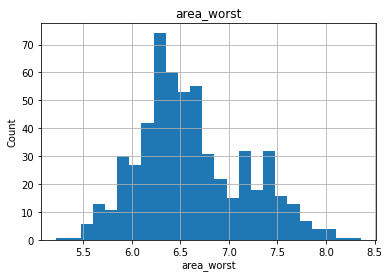

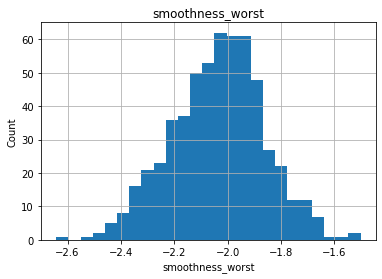

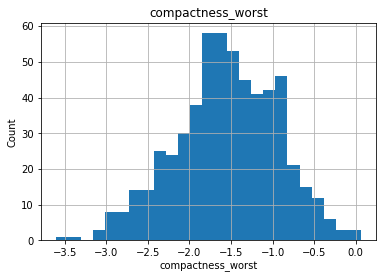

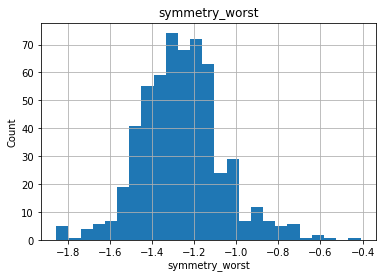

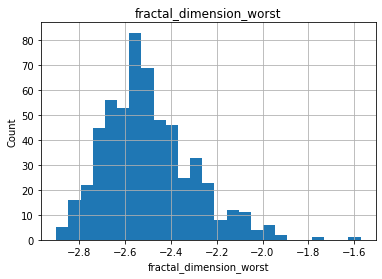

In [8]:
#Conversion from random to log normal distribution on possible features

for feature in continuous_columns:
    if feature != 'diagnosis':
        if 0 in data[feature].unique():   #Since log(0) is infinite we cant apply log normalalization to the features with '0' in it!
            pass
        else:
            data[feature]=np.log(data[feature])
            data[feature].hist(bins=25)
            plt.xlabel(feature)
            plt.ylabel("Count")
            plt.title(feature)
            plt.show()

In [62]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,2.889816,2.339881,4.810557,6.908755,-2.133687,-1.281574,0.3001,0.14710,-1.419231,-2.541985,0.090754,-0.099489,2.150482,5.033049,-5.051614,-3.015119,0.05373,0.01587,-3.505558,-5.084336,3.233961,2.852439,5.218191,7.610358,-1.818925,-0.407066,0.7119,0.2654,-0.776311,-2.129472
1,M,3.023834,2.877512,4.889597,7.189922,-2.468168,-2.542875,0.0869,0.07017,-1.708154,-2.870510,-0.609726,-0.309382,1.223187,4.305146,-5.254300,-4.336671,0.01860,0.01340,-4.276586,-5.645891,3.218476,3.153163,5.067646,7.578657,-2.089088,-1.678788,0.2416,0.1860,-1.290984,-2.418894
2,M,2.980111,3.056357,4.867534,7.092574,-2.210918,-1.833207,0.1974,0.12790,-1.575520,-2.813577,-0.293566,-0.239654,1.522790,4.543614,-5.091303,-3.217377,0.03832,0.02058,-3.794240,-5.388023,3.159975,3.239854,5.027165,7.443664,-1.935168,-0.856843,0.4504,0.2430,-1.018047,-2.435203
3,M,2.435366,3.014554,4.351310,5.956096,-1.948413,-1.259133,0.2414,0.10520,-1.348228,-2.328518,-0.701986,0.144966,1.236924,3.304319,-4.698383,-2.595883,0.05661,0.01867,-2.819596,-4.687683,2.702032,3.277145,4.593806,6.341593,-1.561601,-0.143524,0.6869,0.2575,-0.409774,-1.754464
4,M,3.010128,2.663053,4.906015,7.167809,-2.299590,-2.018911,0.1980,0.10430,-1.709811,-2.833103,-0.278128,-0.246796,1.693411,4.547965,-4.466278,-3.704602,0.05688,0.01885,-4.042132,-5.275578,3.115292,2.813611,5.025195,7.362011,-1.984859,-1.584745,0.4000,0.1625,-1.442230,-2.566811


In [9]:
data['diagnosis'] = np.where(data['diagnosis'] == 'M' ,1,0 )

In [10]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [11]:
y = data['diagnosis']
data = data.drop(['diagnosis'],axis = 1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns = [features])

data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.137432,-2.699007,1.281106,1.130212,1.488710,2.224472,2.652874,2.532475,2.027017,2.170334,2.134567,-0.479340,2.336985,2.272542,-0.062154,1.330351,0.724026,0.660820,1.296653,1.223044,1.753777,-1.515766,2.019370,1.793821,1.261061,1.853870,2.109526,2.296076,2.411453,1.882817
1,1.700581,-0.261824,1.596178,1.712684,-0.811015,-0.328642,-0.023846,0.548144,0.076139,-0.906520,0.841468,-0.971653,0.618321,1.271933,-0.609571,-0.702767,-0.440780,0.260162,-0.959636,0.156404,1.697709,-0.265450,1.501383,1.736644,-0.301171,-0.208226,-0.146749,1.087084,-0.164049,0.403244
2,1.516856,0.548916,1.508232,1.511015,0.957706,1.107862,1.363478,2.037231,0.971717,-0.373306,1.425104,-0.808102,1.173610,1.599742,-0.169348,1.019191,0.213076,1.424827,0.451873,0.646208,1.485898,0.094983,1.362099,1.493162,0.588879,1.124557,0.854974,1.955000,1.201772,0.319872
3,-0.772188,0.359416,-0.549561,-0.843332,2.762558,2.269896,1.915897,1.451707,2.506444,4.169589,0.671153,0.094036,0.643781,-0.103847,0.891852,1.975318,0.819518,1.115007,3.304012,1.976462,-0.172145,0.250025,-0.128969,-0.494594,2.749054,2.281204,1.989588,2.175786,4.245660,3.799927
4,1.642990,-1.234007,1.661625,1.666874,0.348043,0.731961,1.371011,1.428493,0.064951,-0.556180,1.453603,-0.824854,1.489843,1.605723,1.518720,0.269628,0.828471,1.144205,-0.273543,0.859791,1.324116,-1.677202,1.355324,1.345888,0.301539,-0.055736,0.613179,0.729259,-0.920907,-0.352933


In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,y,test_size = 0.1, random_state = 42)

# Model Selection and evaluation

Support Vector Classifier

In [96]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf' , C= 1.0)
svc.fit(x_train,y_train)

SVC()

In [97]:
svc.score(x_train,y_train),svc.score(x_test,y_test)

(0.98828125, 0.9824561403508771)

K Neighbours Classifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [107]:
neigh.score(x_train,y_train),neigh.score(x_test,y_test)

(0.9765625, 0.9649122807017544)

Gaussian naive bayes classifier

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [15]:
gnb.score(x_train,y_train),gnb.score(x_test,y_test)

(0.947265625, 0.9473684210526315)